In [1]:
import numpy as np
import PIL
import cv2
import albumentations as alb
from src.generator import overlay
import importlib  
from os.path import dirname

Не забудьте установить генератор штрихкодов, чтобы иметь возможность генерировать штрихкоды
```
pip install git+https://github.com/WhyNotHugo/python-barcode
```

In [2]:
import barcode
from barcode.writer import ImageWriter

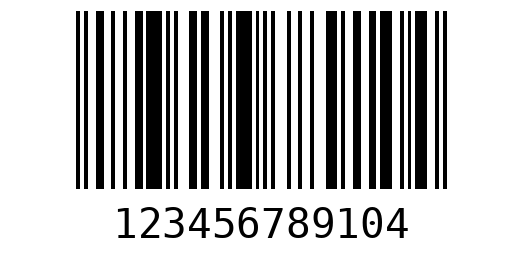

In [3]:
ean = barcode.UPCA('123456789102', writer=ImageWriter())
ean.render()

In [4]:
ean = barcode.get('ean8', '123456789102', writer=ImageWriter())
barcode_mask = ean.render()
barcode_mask = 255 - cv2.cvtColor(np.asarray(barcode_mask), cv2.COLOR_RGB2GRAY)
h, w = barcode_mask.shape

barcode_image = np.zeros((h, w, 3))

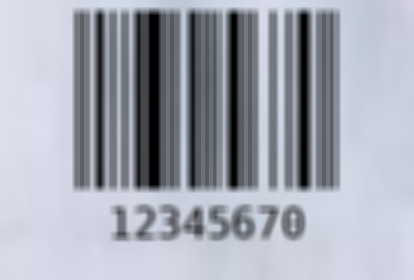

In [5]:
background = cv2.imread('./backgrounds/background_2.jpg')

image_res, mask = overlay(
    background, 
    barcode_image, 
    barcode_mask,
    transforms=alb.Compose([
        alb.Blur((5, 9), p=1)
    ])
)
PIL.Image.fromarray(image_res)

In [6]:
print(image_res.shape)

(280, 414, 3)
